# Lab 1 (House Pricing Regression)
# Name: Srinibas Masanta
# Roll Number: 202318054

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("Housing.csv")

In [30]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [33]:
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [34]:
df.shape

(545, 13)

In [35]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


The dataset comprises 545 entries and 13 features, capturing various aspects of housing attributes such as price, area, number of bedrooms, and additional amenities. The numeric features exhibit considerable variability, with housing prices ranging from ₹1.75 million to ₹13.3 million, and areas spanning 1,650 to 16,200 square feet. The categorical features like `mainroad`, `guestroom`, and `airconditioning` are binary, indicating the presence or absence of specific amenities. No missing values are present, and the dataset is well-prepared for further analysis, with the majority of houses having 2-3 bedrooms and 1-2 bathrooms.

## EDA

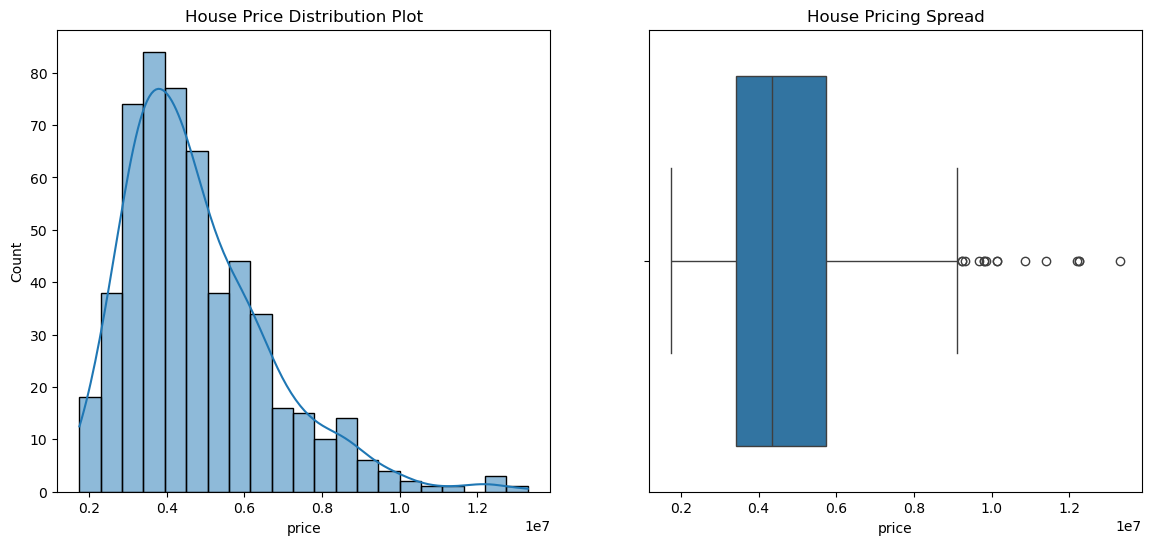

In [38]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('House Price Distribution Plot')
sns.histplot(df.price, kde=True) 

plt.subplot(1, 2, 2)
sns.boxplot(x=df.price)
plt.title('House Pricing Spread')

plt.show()

Inference : The plot seemed to be right-skewed mildly. There is a slight difference between the mean and the median of the price distribution.

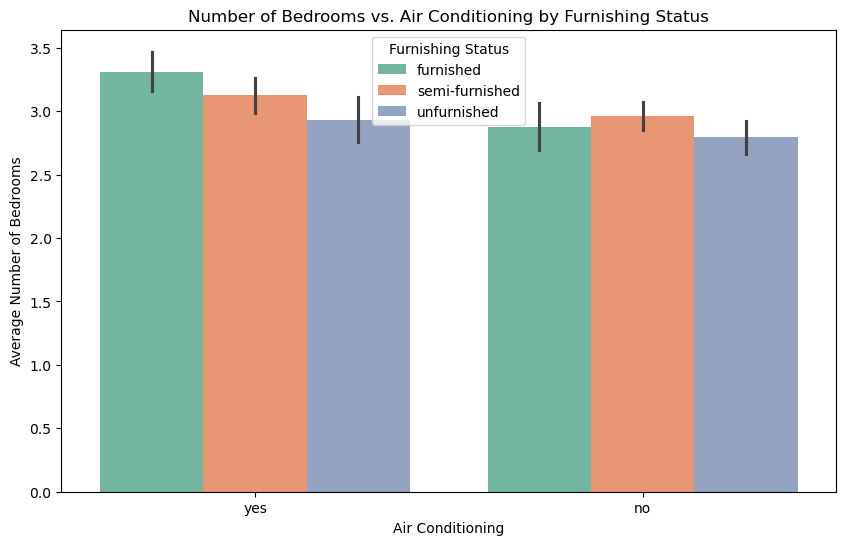

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airconditioning', y='bedrooms', hue='furnishingstatus', data=df, palette='Set2')

plt.title('Number of Bedrooms vs. Air Conditioning by Furnishing Status')
plt.xlabel('Air Conditioning')
plt.ylabel('Average Number of Bedrooms')
plt.legend(title='Furnishing Status')
plt.show()

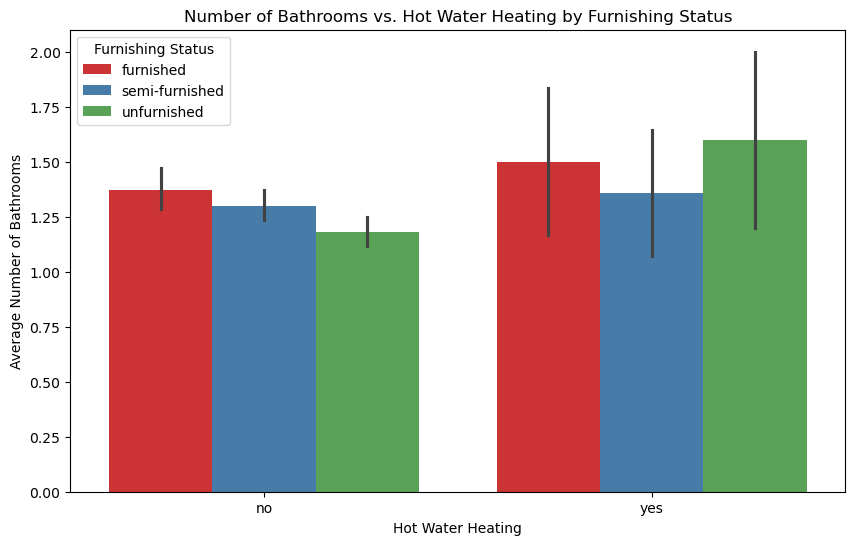

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hotwaterheating', y='bathrooms', hue='furnishingstatus', data=df, palette='Set1')

plt.title('Number of Bathrooms vs. Hot Water Heating by Furnishing Status')
plt.xlabel('Hot Water Heating')
plt.ylabel('Average Number of Bathrooms')
plt.legend(title='Furnishing Status')
plt.show()

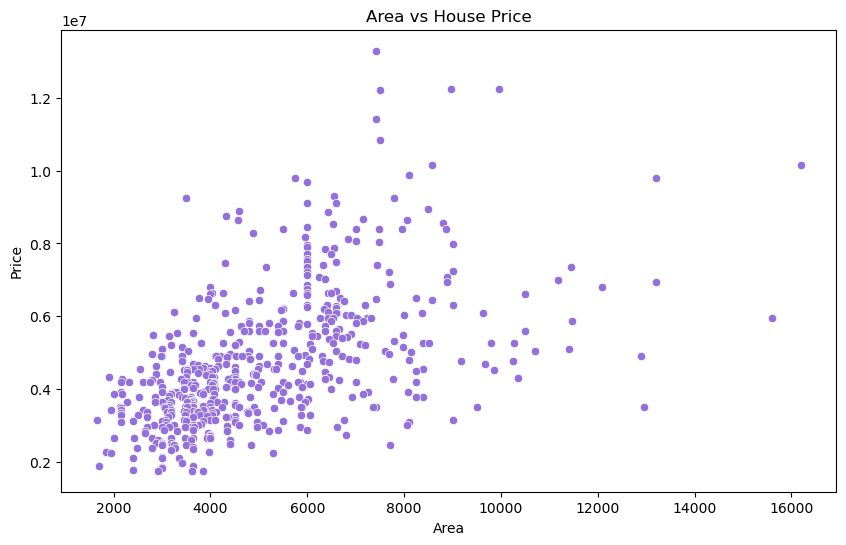

In [42]:
# Scatter plot of area vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, color='mediumpurple')
plt.title('Area vs House Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

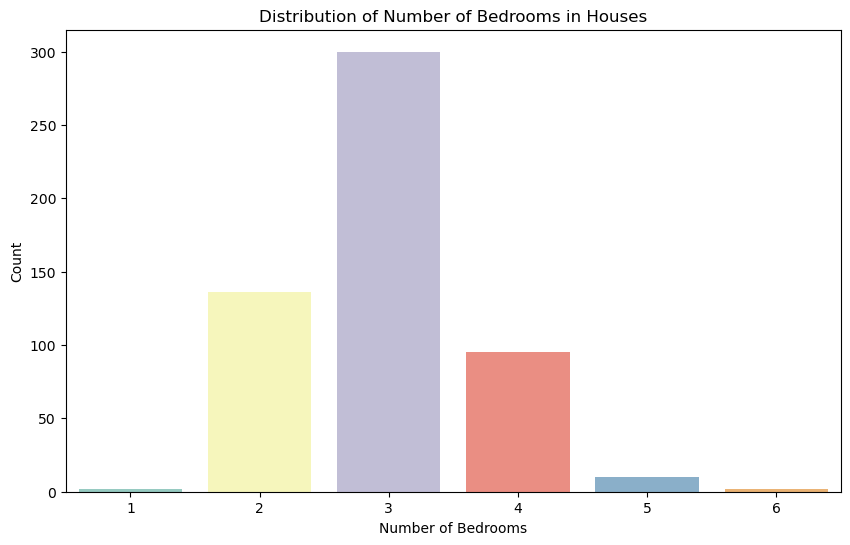

In [43]:
# Countplot of number of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', hue='bedrooms', data=df, palette='Set3', order=sorted(df['bedrooms'].unique()), legend=False)

plt.title('Distribution of Number of Bedrooms in Houses')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


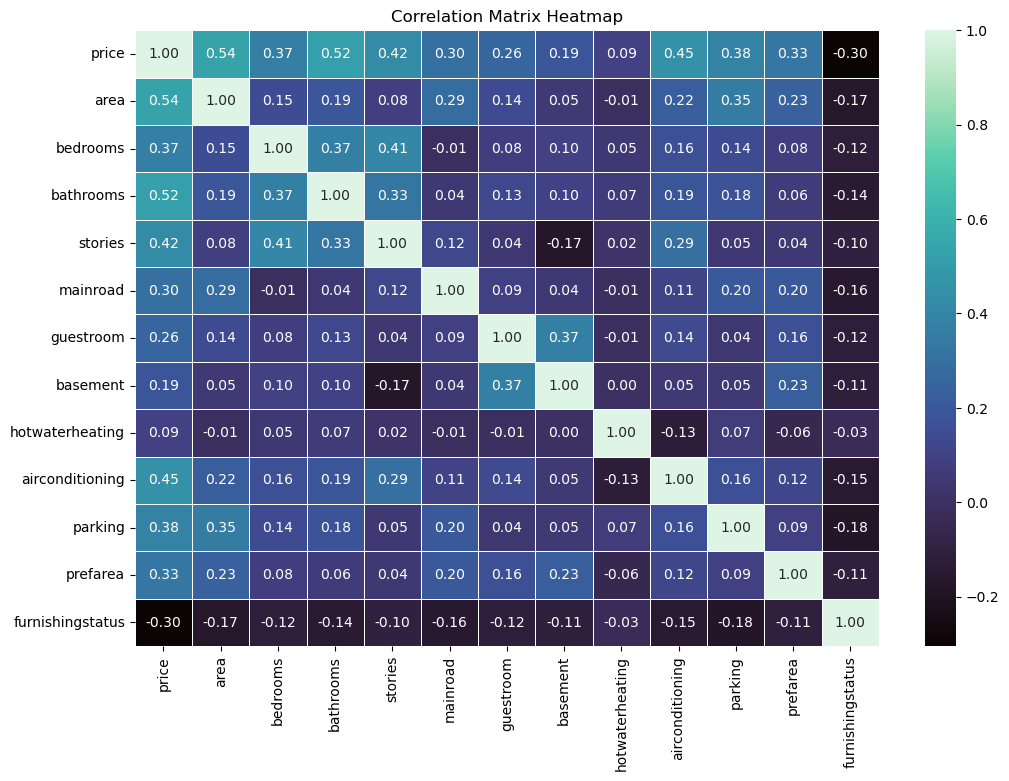

In [45]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='mako', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [46]:
from scipy import stats

def remove_outliers_iqr(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[cols] >= (Q1 - 1.5 * IQR)) & (df[cols] <= (Q3 + 1.5 * IQR))
    df_out = df.loc[filter.all(axis=1)]
    return df_out

numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_cleaned = remove_outliers_iqr(df, numeric_cols)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df_cleaned.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

df_scaled.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,3.229302,0.687763,1.735836,-0.500988,0.613917,1,0,1,0,0,1.822229,0,1
16,3.229302,1.022328,1.735836,1.773105,0.613917,1,1,1,0,1,0.532180,1,2
18,3.085816,-0.092888,0.216569,1.773105,0.613917,1,1,0,0,1,1.822229,0,0
19,3.061901,0.921958,0.216569,1.773105,0.613917,1,0,0,0,1,0.532180,1,1
20,2.990158,-0.249018,0.216569,-0.500988,0.613917,1,0,1,1,0,1.822229,0,1


## Linear Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
X = df_scaled.drop(columns=['price'])  
y = df_scaled['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R² Score: {r2_linear}")

Linear Regression:
Mean Squared Error: 0.46319816687985893
R² Score: 0.6347509278895711


## Polynomial Regression

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_degree = 0
best_r2 = float('-inf')
best_mse = float('inf')

for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train_poly, y_train)
    
    y_pred = lr_model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f'Degree: {degree}, R^2 Score: {r2}, MSE: {mse}')
    
    if r2 > best_r2:
        best_r2 = r2
        best_mse = mse
        best_degree = degree

print(f'\nBest Degree: {best_degree}')
print(f'Best R^2 Score: {best_r2}')
print(f'Best MSE: {best_mse}')

Degree: 1, R^2 Score: 0.6347509278895711, MSE: 0.46319816687985904
Degree: 2, R^2 Score: -1.3633392800452945e+21, MSE: 1.7289469120440678e+21
Degree: 3, R^2 Score: -2.7429942754689994e+20, MSE: 3.478584936076309e+20
Degree: 4, R^2 Score: -2.705658642345651e+16, MSE: 3.431236980550757e+16

Best Degree: 1
Best R^2 Score: 0.6347509278895711
Best MSE: 0.46319816687985904


### Observation:

The linear regression model performs well with an R² score of 0.635 and an MSE of 0.463, indicating a reasonable fit for the data. In contrast, polynomial regression models with degrees 2, 3, and 4 show significantly worse performance, as evidenced by their extremely low R² scores and high MSE values. These results suggest severe overfitting with higher polynomial degrees, leading to poor generalization on the test set. The optimal model is therefore the linear regression model with a polynomial degree of 1, providing the best balance between complexity and performance.